# House Price Prediction using XGBoost Regression

In [3]:
# import the library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
# Loading the dataset 
data = pd.read_csv(r"C:\Users\utkar\100 days ML\House Price Prediction\BostonHousing.csv")

In [5]:
# first 5 row of the data 
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# checking for missing value 
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [7]:
# information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
# checking the total number of row and columm 
data.shape

(506, 14)

In [10]:
# Statistical measure of boston house data
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# Understanding the correlation between various features in the datasets
correlation = data.corr()

<Axes: >

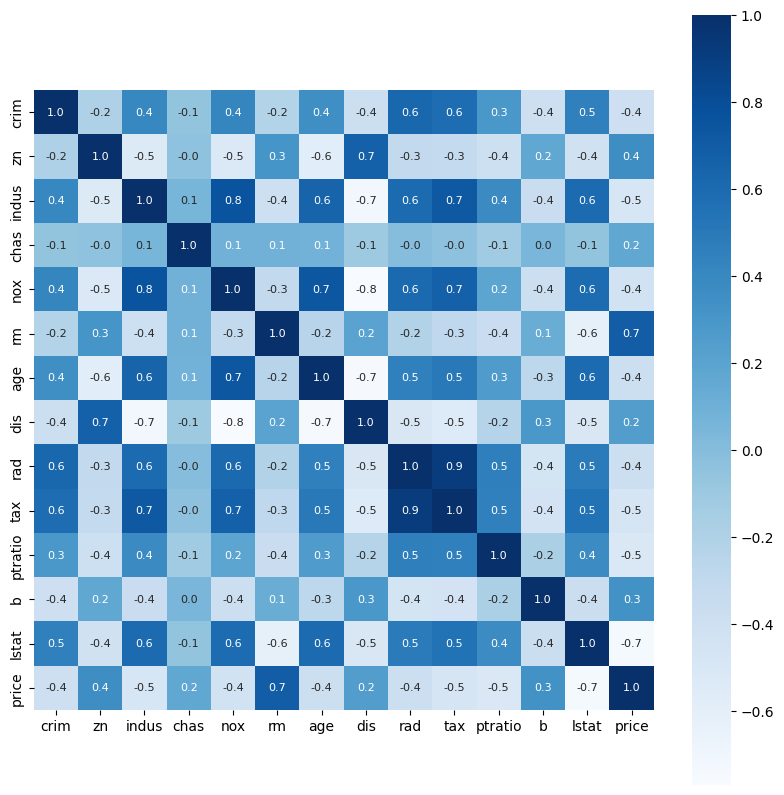

In [13]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True , square = True , fmt= '.1f', annot = True,annot_kws = {'size':8},cmap = 'Blues') 

In [14]:
# splitting the data and target
x = data.drop('price', axis = 1)
y = data['price']

In [15]:
print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [16]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [17]:
# splitting the data into trining and test data 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2 )

In [19]:
# shape of X , X_train , X_test
print(x.shape, X_train.shape , X_test.shape)

(506, 13) (404, 13) (102, 13)


In [20]:
print(X_train)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
37   0.08014   0.0   5.96     0  0.499  5.850  41.5  3.9342    5  279   
286  0.01965  80.0   1.76     0  0.385  6.230  31.5  9.0892    1  241   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
25   0.84054   0.0   8.14     0  0.538  5.599  85.7  4.4546    4  307   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
22   1.23247   0.0   8.14     0  0.538  6.142  91.7  3.9769    4  307   
72   0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873    4  305   
493  0.17331   0.0   9.69     0  0.585  5.707  54.0  2.3817    6  391   
15   0.62739   0.0   8.14     0  0.538  5.834  56.5  4.4986    4  307   
168  2.30040   0.0  19.58     0  0.605  6.319  96.1  2.1000    5  403   

     ptratio       b  lstat  
321     19.6  396.90   6.87  
37      19.2  396.90   8.77  
286     18.2  341.60  12.93  
2  

In [21]:
# loading the model 
model = XGBRegressor()

In [22]:
# trainin the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Model evaluation 


In [27]:
# Prediction on training data 
training_data_prediction = model.predict(X_train)

In [28]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [34]:
# R square error and mean absolute error  for training data
score_1 = metrics.r2_score(Y_train,training_data_prediction )

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction )
print("The R squared error:", score_1)
print("The Mean Absolute error is :" , score_2)

The R squared error: 0.9999980039471451
The Mean Absolute error is : 0.0091330346494618


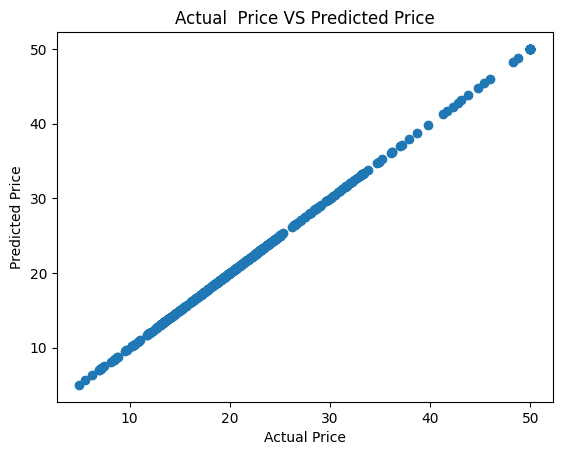

In [35]:
## Visualizing the actual Price and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual  Price VS Predicted Price")
plt.show()

In [31]:
# Prediction on test data 
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[22.007828  21.22598   30.466019  27.735027   9.134951  12.740403
 25.738058  27.750889  25.364376  20.229292  27.821787  24.7761
 19.771252  20.497349  12.970438  22.86288   19.605635  10.677987
  8.277654  15.529657  22.842052  20.002996  34.06762   18.943192
 15.624948  18.787666  46.0246    33.05114   34.804283  19.070232
 17.53711   20.27066   31.102339  24.026129  12.199101  18.224184
 10.182956  21.252314  22.891352  21.458113  26.451164  12.1898775
 27.141438   8.322471  21.356699  12.768549  35.221687  14.574406
 32.06173   15.088605  31.076805  26.808199   6.1558666 34.42615
 25.135347  19.508772  19.424906  19.58183   16.680052  22.962534
 20.904106  21.24      18.46788   29.243906  33.434864  26.021257
 49.91979   25.905489   9.713634  24.058743  16.63922    9.0341625
 13.197622  18.80479   26.985659  24.746912  22.200838  21.017391
 19.30188   24.098715  34.517494  19.51518   20.331131  31.346212
 47.815742  36.102997  17.42751   24.595816  29.387545  18.68302
 19.893139  

In [32]:
# R square error and mean absolute error for testing data
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("The R squared error:", score_1)
print("The Mean Absolute error is :" , score_2)

The R squared error: 0.9051721149855378
The Mean Absolute error is : 2.0748727686264927


In [36]:
# predictive system 
input_data = (0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98)
#input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)
# change the input data to a numpy aaray 
data = np.asarray(input_data)
# reshape the array 
reshape_data = data.reshape(1,-1)
# prediction
prediction = model.predict(reshape_data)
print(prediction)

[23.99494]
